# assumptions of linear regression:

01.linear relationship
02.constatnt varience of error(homoscedasticity)
03.normal distrubution of errors
04.no corrrelation between error terms
05.multicollinearity

# steps in implementing linear regression model:
01.importing libs and datasets
02.checking for mumlticollineaarity and remove them
03.scaling the datasets
04.creating the test and train partitions
05.implementing linear regreession model using scikitlearn
06.generating the prediction over a test dataset
07.evaluating the model
08.plotting the residuals
09.veerifying the assumptions of linear regression
10.visualizing the coefficients to interpret the model results

# Importing the libs:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("transformed_housing_data_2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# scaling the dataset:

In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data["Sale_Price"]
X=scaler.fit_transform(data.drop(columns=["Sale_Price"]))
X=pd.DataFrame(data=X,columns=data.drop(columns=["Sale_Price"]).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# checking for multicollinearity:

In [4]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [5]:
##pair of independent variables with correaltion greather than the 0.5
k = X.corr()
z =[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# Calculating VIF factor function of the statsmodels:

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

##calculating the vif factor for every column
vif=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
vif

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [7]:
#there are 7 multicollinear independent variables in data
vif[vif==vif.max()].index[0]

'Flat Area (in Sqft)'

In [8]:
def mc_remover(data):
    vif=pd.Series([variance_inflation_factor(data,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        print(f"{vif[vif==vif.max()].index[0]} has been removed")
        return data
    else:
        print("NO multicollinearity is not present :")
        return data

In [9]:
for i in range(7):
    vif_data=mc_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
NO multicollinearity is not present :
NO multicollinearity is not present :
NO multicollinearity is not present :
NO multicollinearity is not present :
NO multicollinearity is not present :


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [10]:
##checking for multicolinearity in remaining columns:
vif=pd.Series([variance_inflation_factor(vif_data,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
vif,len(vif)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

# train/test data:

In [11]:
X=vif_data
Y=data["Sale_Price"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# Linear Regression:

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [14]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [15]:
Prediction=lr.predict(X_test)
lr.score(X_test,Y_test)

0.8461987715586199

# verifying the assumptions

# 1.Residuals:

In [16]:
residual=Prediction - Y_test

residual_table=pd.DataFrame({"residual":residual,
                            "Prediction":Prediction})
residual_table.sort_values(by="Prediction")

,residual,Prediction
1147,-226899.922361,-1.518999e+05
19450,-210795.272576,-6.879527e+04
4201,-140057.717848,9.942282e+03
11586,-156956.559744,3.104344e+04
13714,-145500.198922,3.449980e+04
...,...,...
6506,369963.447042,1.499538e+06
9252,398475.423771,1.528050e+06
15253,441105.516766,1.570681e+06
18475,444424.624355,1.574000e+06


In [17]:
z=[i for i in range(int(residual_table["Prediction"].max()))]
k=[0 for i in range(int(residual_table["Prediction"].max()))]

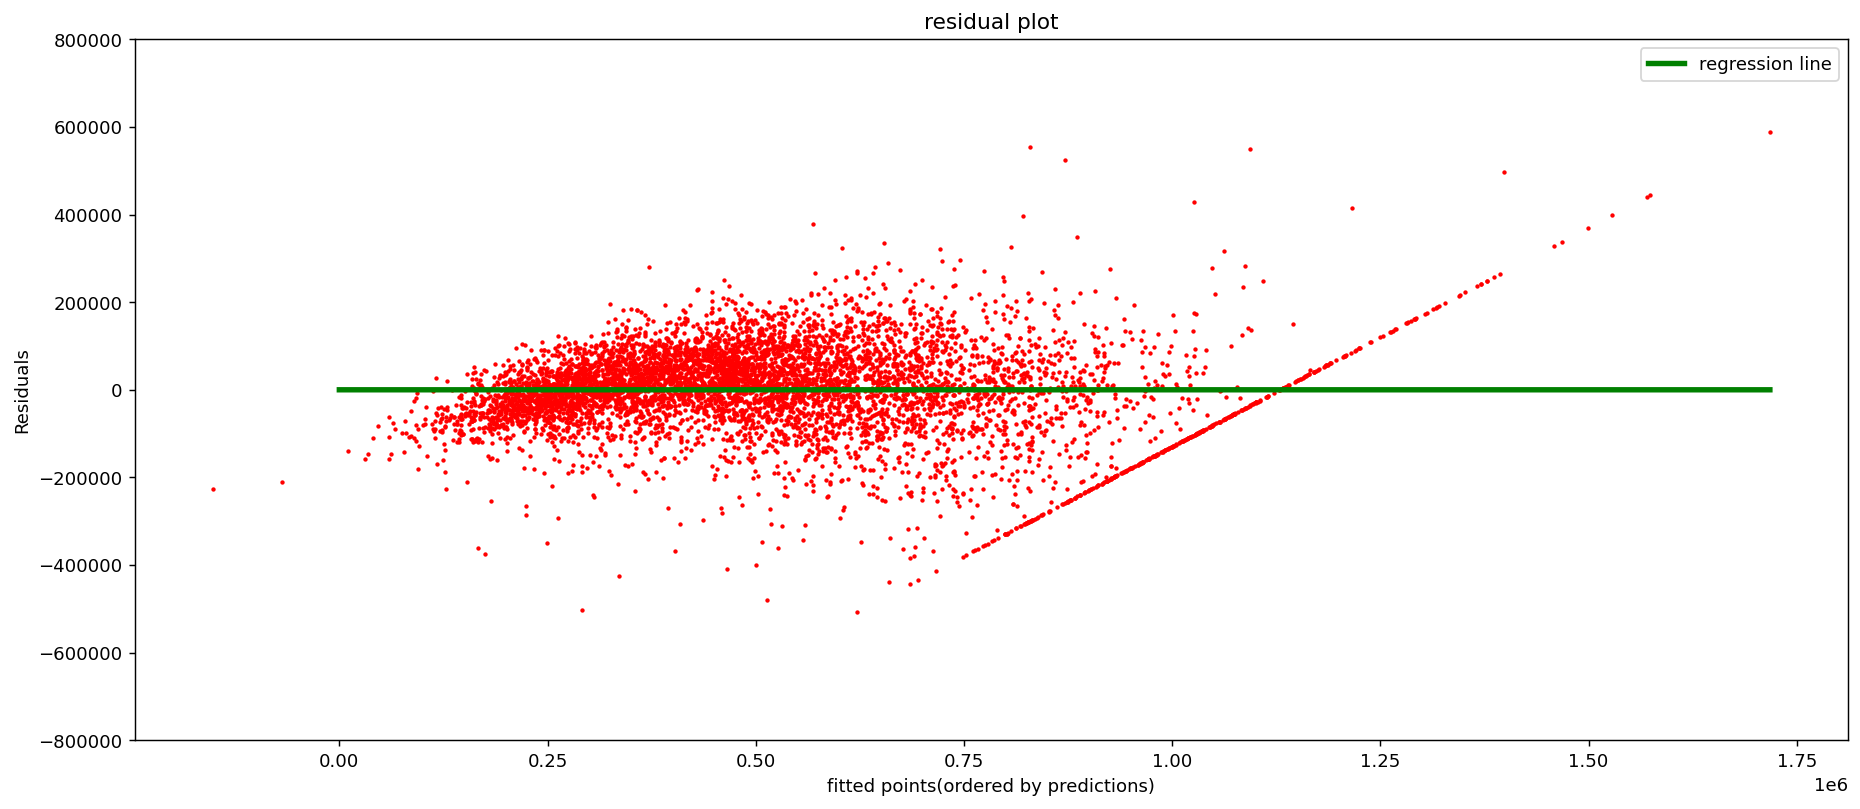

In [18]:
plt.figure(dpi=130,figsize=(17,7))

plt.scatter(residual_table["Prediction"],residual_table["residual"],color="red",s=2)
plt.plot(z,k,color="green",linewidth=3,label="regression line")
plt.ylim(-800000,800000)
plt.xlabel("fitted points(ordered by predictions)")
plt.ylabel("Residuals")
plt.title("residual plot")
plt.legend()
plt.show()

# 2.Distrubution of errors:


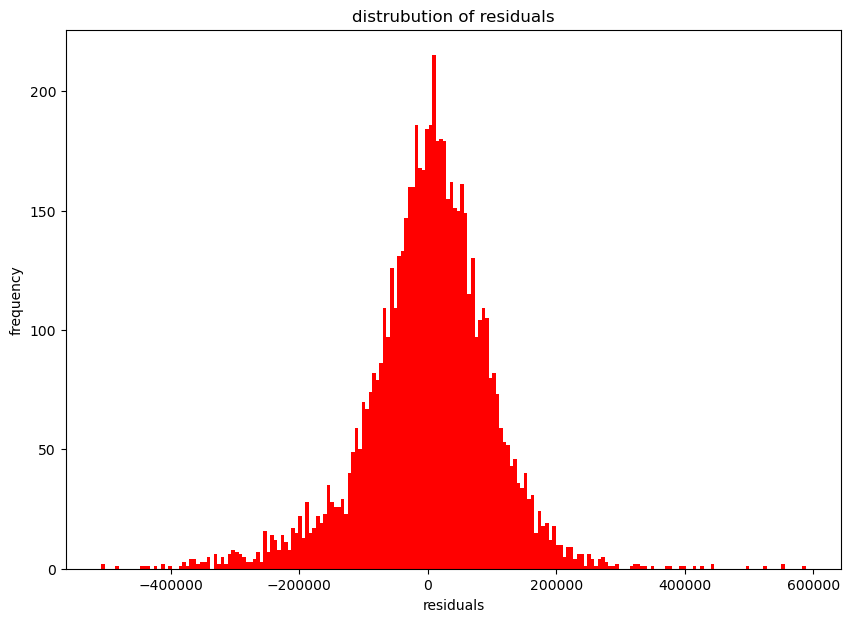

In [19]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residual_table['residual'],color="red",bins=200)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.title("distrubution of residuals")
plt.show()

# Model Coefficient:

In [23]:
Coefficient_table=pd.DataFrame({'column':X_train.columns,
                               'Coefficients':lr.coef_})
Coefficient_table=Coefficient_table.sort_values(by='Coefficients')

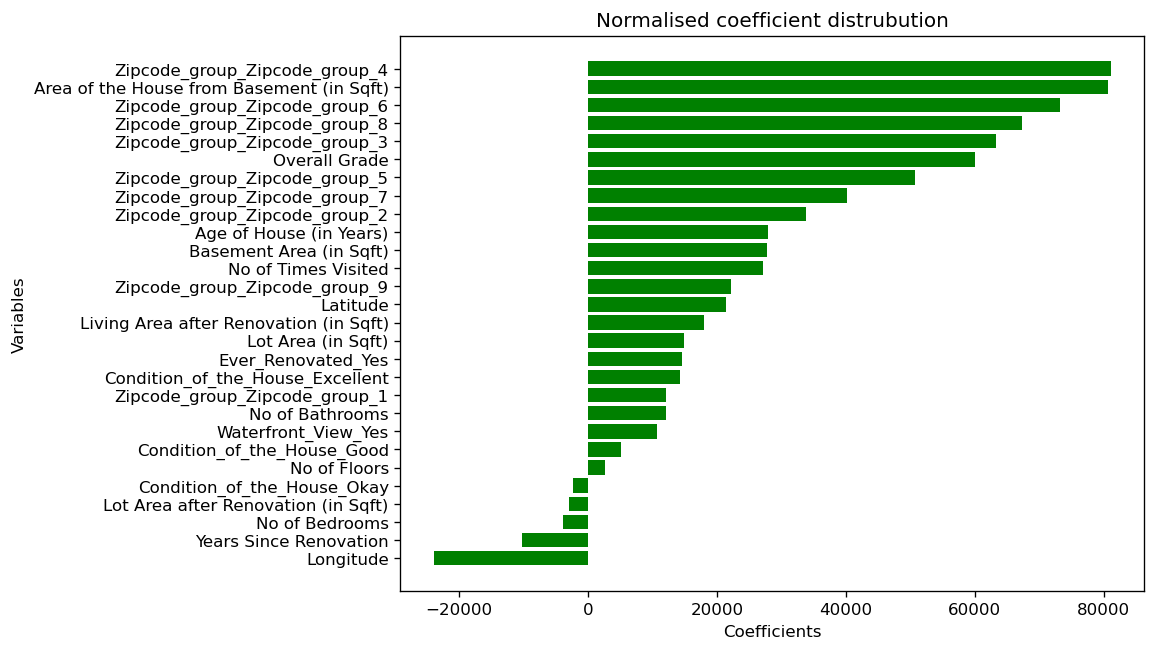

In [28]:
plt.figure(figsize=(8,6),dpi=120)
x=Coefficient_table["column"]
y=Coefficient_table["Coefficients"]
plt.barh(x,y,color='green')
plt.xlabel("Coefficients")
plt.ylabel("Variables")
plt.title("Normalised coefficient distrubution")
plt.show()